In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving df.csv to df.csv


In [4]:
import pandas as pd #هدف از کتابخانه پنداس
#خواندن داده ها از فرمت های مختلف
#پاکسازی و پیش پردازش داده ها (مدیریت مقادیر گمشده),(تبدیل نوع داده), (پاکسازی داده ها)
#تجزیه و تحلیل و اکتشاف داده ها (آمار توصیفی), (گردآوری داده ها) (تجزیه و تحلیل سری زمانی)
#تجسم داده ها (ایجاد تجسمات داخلی)(یکپارچه سازی بی عیب و نقص با Matplotlib)
#دستکاری و تبدیل داده ها (فیلتر کردن و انتخاب داده ها), (تبدیل داده ها), (ادغام و پیوستن به داده ها)

In [5]:
df = pd.read_csv('df.csv')

In [6]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5887,Manufacturing Data Analyst Engineer,$42K - $76K (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


#Salary column cleaning

In [8]:
def dollors_remover( a):
  a = a.replace('$', ' ')
  return a

In [9]:
def k_remover(a):
  a = a.replace('K' , ' ')
  return a

In [10]:
def glassdoor_remover(a):
  a = a.replace('(Glassdoor est.)' , ' ')
  return a

In [11]:
df['Salary Estimate'] = df['Salary Estimate'].apply(dollors_remover).apply(k_remover).apply(glassdoor_remover)

In [12]:
df = df[df['Salary Estimate'] != '-1']

In [13]:
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [14]:
def splitter(a):
  a = a.split()
  return(a)

In [15]:
df['Salary Estimate'] = df['Salary Estimate'].apply(splitter)

In [16]:
df['Salary Estimate']

0       [111, -, 181]
1       [111, -, 181]
2       [111, -, 181]
3       [111, -, 181]
4       [111, -, 181]
            ...      
5881      [38, -, 64]
5882      [47, -, 89]
5883     [66, -, 113]
5886     [67, -, 111]
5887      [42, -, 76]
Name: Salary Estimate, Length: 5500, dtype: object

In [17]:
def min_finder (a):
  a = a[0]
  return(a)

In [18]:
df['Min_salary'] = df['Salary Estimate'].apply(min_finder)

In [19]:
def max_finder(a):
  a = a[2]
  return(a)

In [20]:
df['Max_salary'] = df['Salary Estimate'].apply(max_finder)

In [21]:
df['Min_salary'] = df['Min_salary'].astype(int)
df['Max_salary'] = df['Max_salary'].astype(int)

In [22]:
df['Average_salary'] = (df['Min_salary'] + df['Max_salary'])/2

In [23]:
df.drop(columns='Salary Estimate', inplace= True)

In [24]:
df.drop(columns='Min_salary', inplace= True)

In [25]:
df.drop(columns='Max_salary', inplace= True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5500 entries, 0 to 5887
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5500 non-null   object 
 1   Rating             5500 non-null   float64
 2   Company Name       5500 non-null   object 
 3   Location           5500 non-null   object 
 4   Size               5500 non-null   object 
 5   Founded            5500 non-null   object 
 6   Type of ownership  5500 non-null   object 
 7   Industry           5500 non-null   object 
 8   Sector             5500 non-null   object 
 9   Revenue            5500 non-null   object 
 10  Average_salary     5500 non-null   float64
dtypes: float64(2), object(9)
memory usage: 515.6+ KB


In [27]:
df.shape

(5500, 11)

In [28]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Average_salary'],
      dtype='object')

# Location column cleaning

In [29]:
df['Location'].value_counts()

Location
Austin, TX          345
Chicago, IL         333
San Diego, CA       327
New York, NY        303
Los Angeles, CA     229
                   ... 
Redlands, CA          1
Ladera Ranch, CA      1
Greenbelt, MD         1
Lanham, MD            1
Euclid, OH            1
Name: count, Length: 501, dtype: int64

In [30]:
def state(a):
  a= a.split()
  a = a[-1]
  return(a)

In [31]:
df['State'] = df['Location'].apply(state)

In [32]:
df['State']

0       NY
1       NY
2       NY
3       NJ
4       NY
        ..
5881    OH
5882    OH
5883    OH
5886    OH
5887    OH
Name: State, Length: 5500, dtype: object

In [33]:
df['State'].value_counts()

State
CA         1311
TX         1243
OH          408
IL          368
PA          324
NY          313
AZ          297
FL          261
MA          239
NJ          232
MI          203
VA          131
DC           85
MD           61
DE           10
Kingdom       4
WI            3
GA            1
ME            1
KY            1
NM            1
NH            1
IN            1
NC            1
Name: count, dtype: int64

In [34]:
df = df[df['State'] != 'Kingdom'] #remove United Kingdom

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5496 entries, 0 to 5887
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5496 non-null   object 
 1   Rating             5496 non-null   float64
 2   Company Name       5496 non-null   object 
 3   Location           5496 non-null   object 
 4   Size               5496 non-null   object 
 5   Founded            5496 non-null   object 
 6   Type of ownership  5496 non-null   object 
 7   Industry           5496 non-null   object 
 8   Sector             5496 non-null   object 
 9   Revenue            5496 non-null   object 
 10  Average_salary     5496 non-null   float64
 11  State              5496 non-null   object 
dtypes: float64(2), object(10)
memory usage: 558.2+ KB


In [36]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Average_salary',
       'State'],
      dtype='object')

In [37]:
df.shape

(5496, 12)

#Rating column cleaning

In [38]:
df = df[df['Rating']!= -1]

In [39]:
df['Rating']

0       3.5
1       4.5
3       3.4
4       3.4
5       2.9
       ... 
5881    3.2
5882    4.2
5883    4.0
5886    4.0
5887    3.6
Name: Rating, Length: 4891, dtype: float64

# Job Title column cleaning

In [40]:
df['Job Title'].value_counts()

Job Title
Data Scientist                                                   530
Data Analyst                                                     296
Data Engineer                                                    267
Senior Data Scientist                                            117
Machine Learning Engineer                                         55
                                                                ... 
Data Scientist - Top Secret w/ SCI Eligibility                     1
Business Intelligence Analyst I                                    1
Business Intelligence Analyst Senior (Chief Financial Office)      1
Business Intelligence Analyst III - Credit Card                    1
Manufacturing Data Analyst Engineer                                1
Name: count, Length: 2552, dtype: int64

In [41]:
set(df['Job Title'])

{'Manager, Data Science, Risk',
 'Senior Scientist, Translational Bioinformatics',
 'Cyber Security Senior Research Scientist',
 'Data Scientist, Research & Development',
 'Sr. Data Scientist - TS/SCI',
 'Data Scientist - Disney Streaming Services',
 'SCIENTIST - GMP - QUALITY CONTROL - HPLC - ELISA',
 'Senior Scientist, Decision Sciences',
 'Applied Data Scientist, Government',
 'Healthcare Data Scientist',
 'Project Lead - Advanced Analytics/Data Science',
 'Data Scientist - Early Career',
 'Biopharmaceutical Drug Product, Principal Scientist/ Investigator',
 'Data Scientist, Supply Chain',
 'Sr Scientist - Research & Advanced Development',
 'US|Prod Dev Scientist-Contractor',
 'Cyber Security Senior Data Scientist',
 'Consultant, Telematics Data Engineer',
 'Environmental Scientist 7',
 'Cell Therapy Process Development Scientist',
 'Machine Learning Engineer/Scientist',
 'Quantitative Researcher Extern -- January',
 'Spark AWS Data Engineer',
 'Data Science Consultant - Supply Chai

In [42]:
len(set(df['Job Title']))

2552

In [43]:
def title_organizer(x):
    x = x.lower()
    if ('data scientist' in x) or ('data science' in x) :
        return 'data scientist'
    elif 'data engineer' in x:
        return 'data engineer'
    elif 'deep learning' in x:
        return 'deep learning engineer'
    elif 'machine learning' in x:
        return 'machine learning engineer'
    elif 'director' in x:
        return 'director'
    elif 'manager' in x:
        return 'manager'
    elif 'analyst' in x:
        return 'analyst'
    elif 'researcher' in x:
        return 'researcher'
    else:
        return 'other'

In [44]:
df['Job Title'] = df['Job Title'].apply(title_organizer)

<ipython-input-44-9cd884ef4483>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].apply(title_organizer)


In [45]:
df['Job Title']

0       data scientist
1       data scientist
3              analyst
4       data scientist
5       data scientist
             ...      
5881             other
5882             other
5883             other
5886           analyst
5887           analyst
Name: Job Title, Length: 4891, dtype: object

In [46]:
df['Job Title'].value_counts()

Job Title
data scientist               1793
analyst                      1048
other                        1009
data engineer                 764
machine learning engineer     162
manager                        67
researcher                     30
director                       15
deep learning engineer          3
Name: count, dtype: int64

In [47]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Average_salary',
       'State'],
      dtype='object')

In [48]:
df = df.drop(columns=['Company Name',
       'Location', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue'])

In [49]:
df

,Job Title,Rating,Average_salary,State
0,data scientist,3.5,146.0,NY
1,data scientist,4.5,146.0,NY
3,analyst,3.4,146.0,NJ
4,data scientist,3.4,146.0,NY
5,data scientist,2.9,146.0,NY
...,...,...,...,...
5881,other,3.2,51.0,OH
5882,other,4.2,68.0,OH
5883,other,4.0,89.5,OH
5886,analyst,4.0,89.0,OH


**# هر آنچه لازم بود پاکسازی شد و دیتاهای لازم رو نگه داشتم و بقیه رو پاک کردم و حالا سیو میکنم**

In [50]:
df.to_csv('my_dataframe1.csv', index=False)  #شاخص دیتافریم را در فایل CSV ذخیره نکند

In [51]:
# Load the DataFrame from the CSV file
df = pd.read_csv('my_dataframe1.csv')

In [52]:
df  #تا اینجاش یعنی  عالی

,Job Title,Rating,Average_salary,State
0,data scientist,3.5,146.0,NY
1,data scientist,4.5,146.0,NY
2,analyst,3.4,146.0,NJ
3,data scientist,3.4,146.0,NY
4,data scientist,2.9,146.0,NY
...,...,...,...,...
4886,other,3.2,51.0,OH
4887,other,4.2,68.0,OH
4888,other,4.0,89.5,OH
4889,analyst,4.0,89.0,OH


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 153.0+ KB


<Axes: >

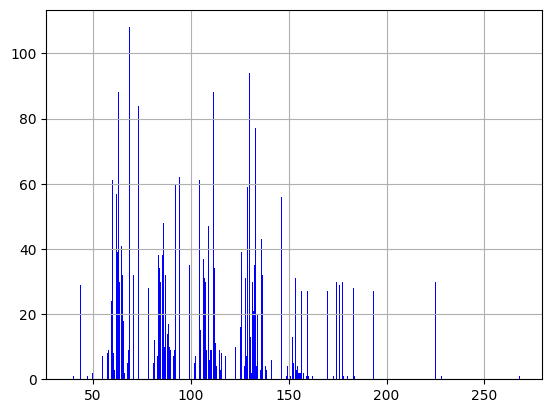

In [54]:
 df['Average_salary'].hist(bins=1000, color='blue')

<Axes: >

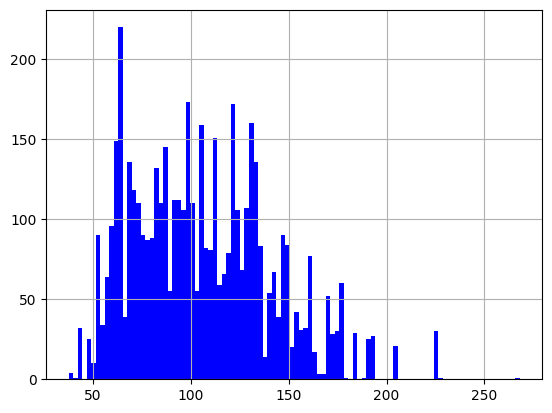

In [55]:
 df['Average_salary'].hist(bins=100, color='blue')

<Axes: >

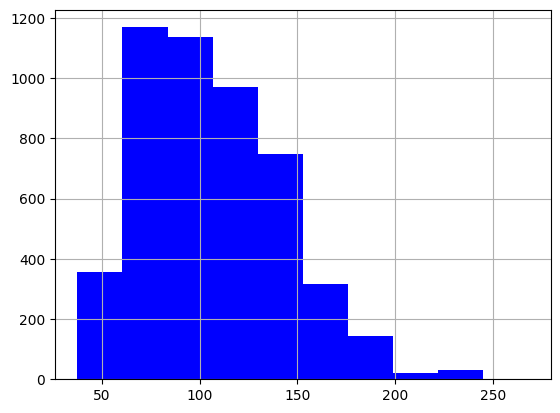

In [56]:
 df['Average_salary'].hist(bins=10, color='blue')  #نمودار نشان می دهد که اکثر مشاهدات (افراد) در بازه حقوقی بین 60,000 تا 70,000 قرار دارند

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

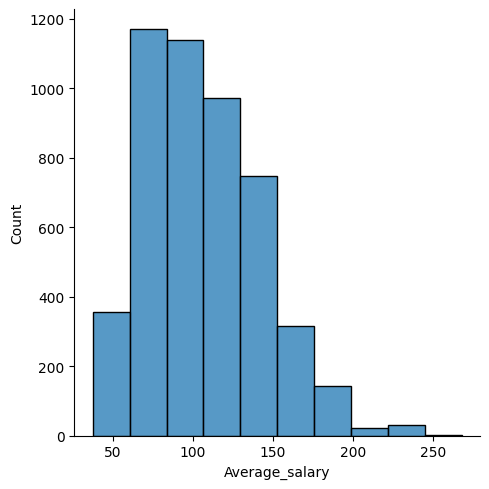

In [58]:
sns.displot(x='Average_salary', data = df, bins = 10)

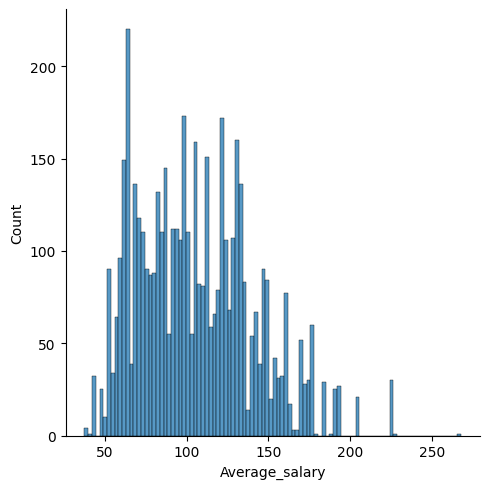

In [59]:
sns.displot(x='Average_salary', data = df, bins = 100)

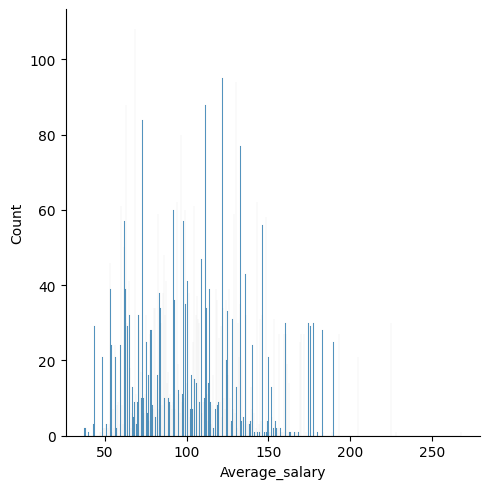

In [60]:
sns.displot(x='Average_salary', data = df, bins = 1000)

<Axes: >

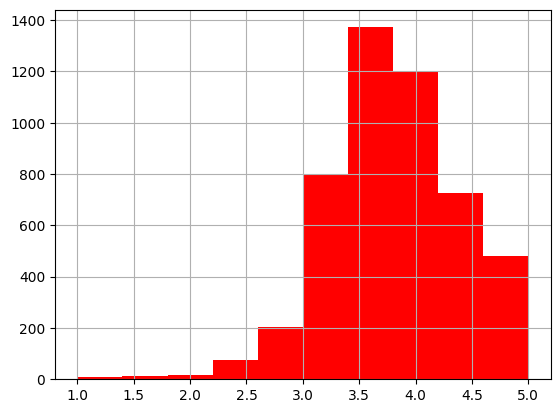

In [61]:
 df['Rating'].hist(bins=10, color='red')  #بین ۳.۴ تا ۳.۸ بیشترین ریت از بین شرکنها یعنی بیشترین ریت شرکتها

<Axes: >

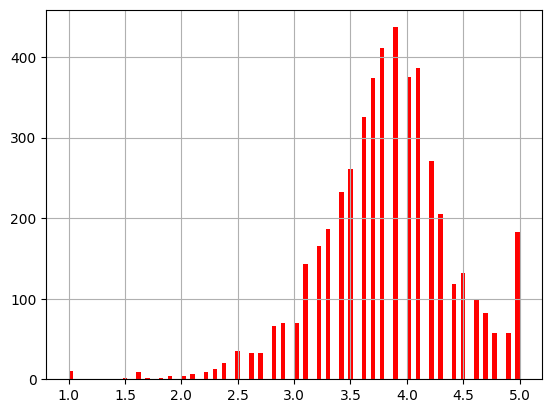

In [62]:
 df['Rating'].hist(bins=100, color='red') #maximum rate is 3.8

<Axes: >

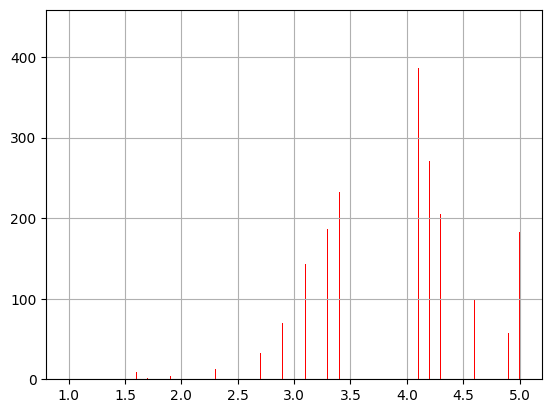

In [63]:
 df['Rating'].hist(bins=1000, color='red')

In [64]:
import seaborn as sns

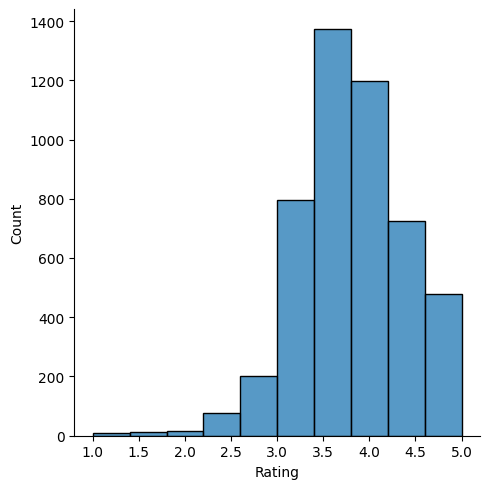

In [65]:
sns.displot(x='Rating', data = df, bins = 10)  #نقطه اوج هیستوگرام در حدود 3.75 قرار دارد

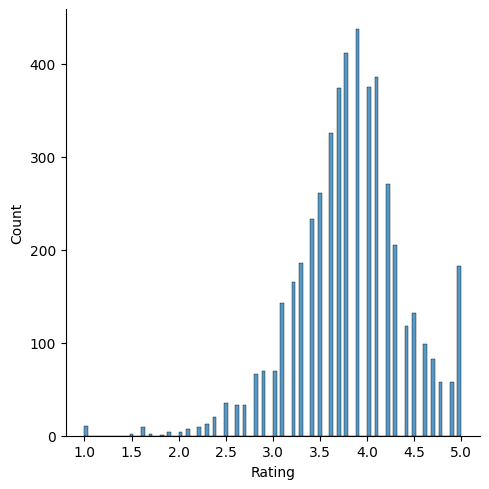

In [66]:
sns.displot(x='Rating', data = df, bins = 100)

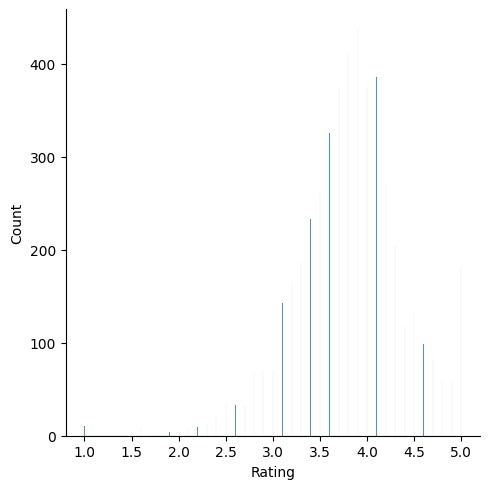

In [67]:
sns.displot(x='Rating', data = df, bins = 1000)

In [68]:
sns.palettes #function in Seaborn is a powerful tool for creating visually appealing and informative statistical graphics.

<module 'seaborn.palettes' from '/usr/local/lib/python3.10/dist-packages/seaborn/palettes.py'>

<ipython-input-69-c51cabc56e8e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') #"Whitegrid" refers to a specific visual style used in data visualization, particularly common in Seaborn plots


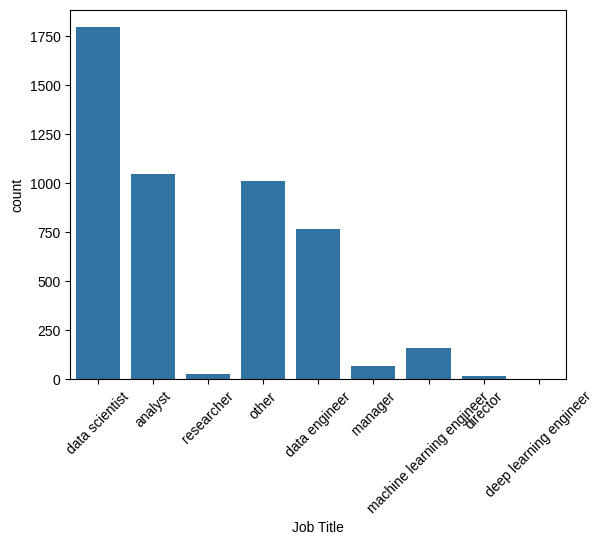

In [69]:
sns.countplot(x='Job Title', data= df)   #توی این جا دیتای تو نوشته هست  یک استرینگ هست نه عدد
plt.xticks(rotation= 45)
plt.style.use('seaborn-whitegrid') #"Whitegrid" refers to a specific visual style used in data visualization, particularly common in Seaborn plots
#The whitegrid style creates a clean and modern aesthetic, making it suitable for various presentations.

<ipython-input-70-9f6f45320794>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


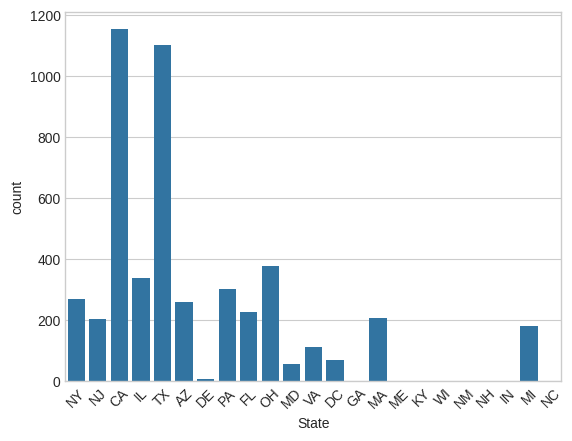

In [70]:
sns.countplot(x='State', data= df)   #توی این جا دیتای تو نوشته هست  یک استرینگ هست نه عدد
plt.xticks(rotation= 45)
plt.style.use('seaborn-whitegrid')

<Axes: xlabel='Rating'>

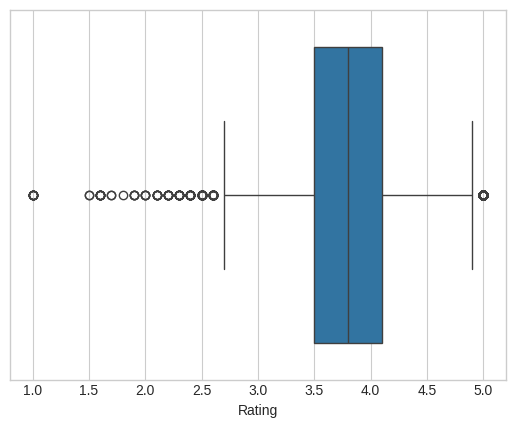

In [71]:
sns.boxplot(x='Rating', data= df)   #این نمودار اطلاعات مفیدی در مورد مرکز، پراکندگی و مقادیر پرت (اوت لایرها) داده ها ارائه می دهد.

<Axes: xlabel='Average_salary'>

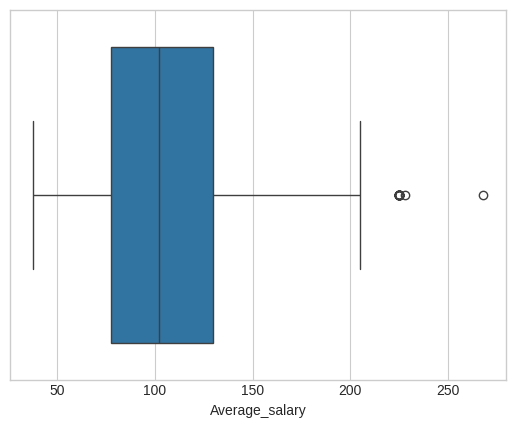

In [72]:
sns.boxplot(x='Average_salary', data= df)

<Axes: xlabel='Rating', ylabel='Average_salary'>

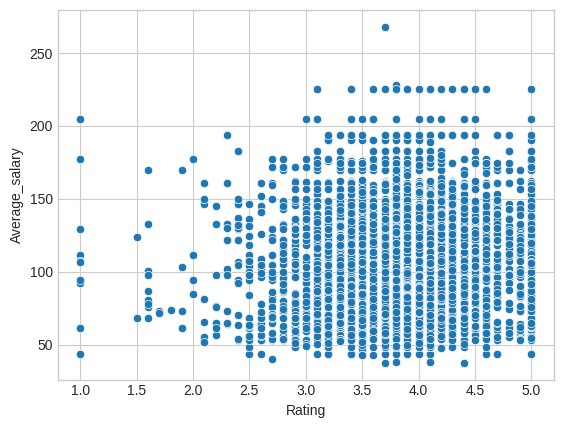

In [73]:
sns.scatterplot(x='Rating', y='Average_salary', data= df)
#تعداد نقطه ها به تمام دیتاهایی است که در دیتا فریممون داریم
#وقتی میخواهیم دو تا پارامتر عددی رو نشون بدیم از این دستور استفاده میکنیم

<Axes: xlabel='Rating', ylabel='Average_salary'>

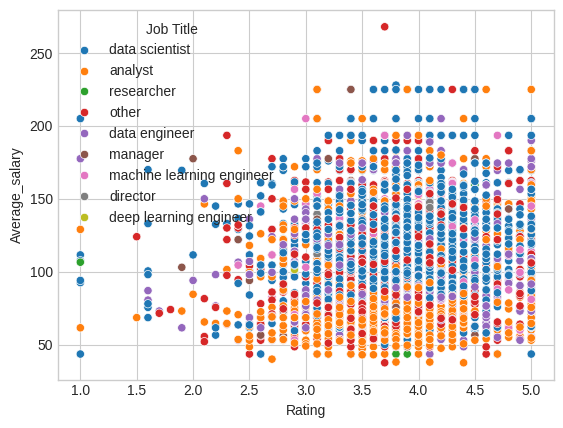

In [74]:
sns.scatterplot(x='Rating', y='Average_salary', data= df, hue='Job Title')  #نمودار بالا خیلی شلوغه من میخوام تفکیک بکنم نمودار بالا رو برای شغلها پس یک عبارت هی یو اضافه میکنم . میخوام تفکیک بر اساس جاب تایتل باشه

  در شکل بالا به نظر میرسه رنگهایی که آبی و نارنجی هستند بیشتر به نظر میرسند به نظر میاد با توجه به شکل دیتا ساینس ها از در آمد بالاتری نسبت به انالیزها برخوردار هستند.

<Axes: xlabel='Rating', ylabel='Average_salary'>

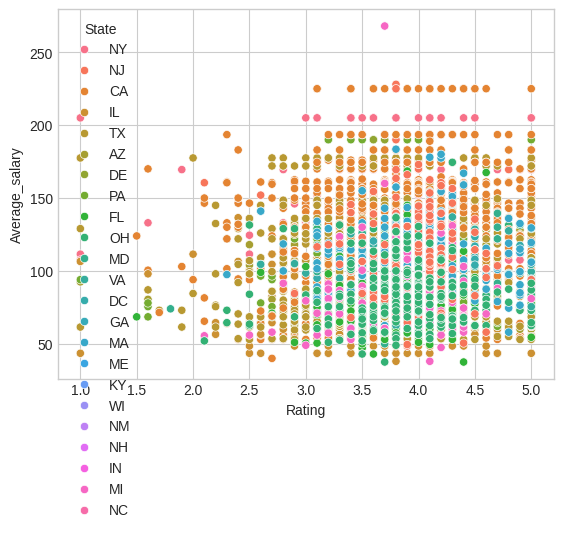

In [75]:
sns.scatterplot(x='Rating', y='Average_salary', data= df, hue='State')

<Axes: xlabel='Rating', ylabel='Average_salary'>

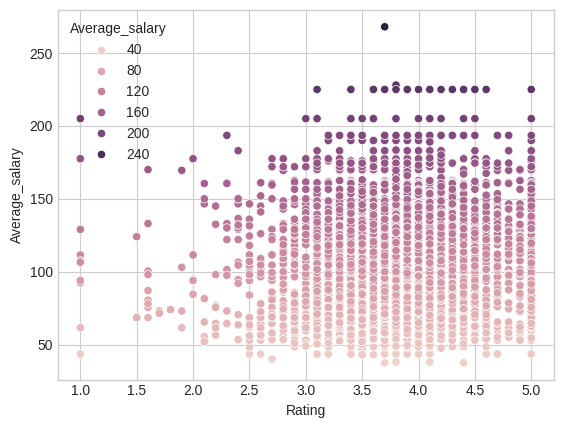

In [76]:
sns.scatterplot(x='Rating', y='Average_salary', data= df, hue='Average_salary')

<Axes: xlabel='Rating', ylabel='Average_salary'>

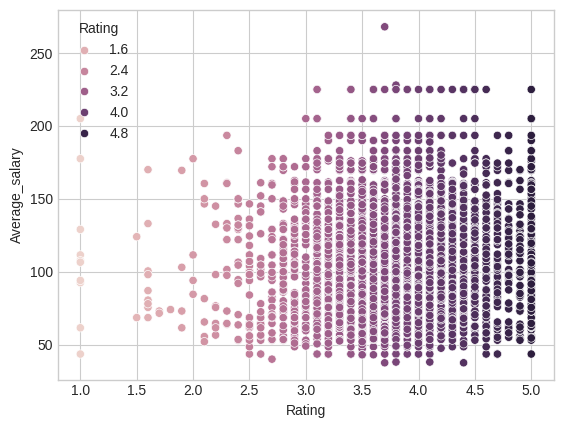

In [77]:
sns.scatterplot(x='Rating', y='Average_salary', data= df, hue='Rating')

# قسمت ریز شدن و بیرون آوردن تک تک دیتاها

In [78]:
df[df['Job Title']=='manager']  #فیلتر شده دیتای اصلیمون است

,Job Title,Rating,Average_salary,State
61,manager,4.0,133.0,NY
264,manager,4.9,107.5,NY
399,manager,4.5,176.0,CA
400,manager,4.5,176.0,CA
412,manager,3.1,176.0,CA
...,...,...,...,...
4145,manager,3.7,74.0,MA
4200,manager,4.1,110.0,MA
4472,manager,3.9,97.5,MI
4652,manager,3.9,48.5,NJ


In [79]:
manager = df[df['Job Title']=='manager']  #اینجا من میام کمی زوم میشم و فقط منجرها رو نسبت به شغل میسنجم

In [80]:
manager.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 61 to 4812
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       67 non-null     object 
 1   Rating          67 non-null     float64
 2   Average_salary  67 non-null     float64
 3   State           67 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.6+ KB


<Axes: xlabel='Rating', ylabel='Average_salary'>

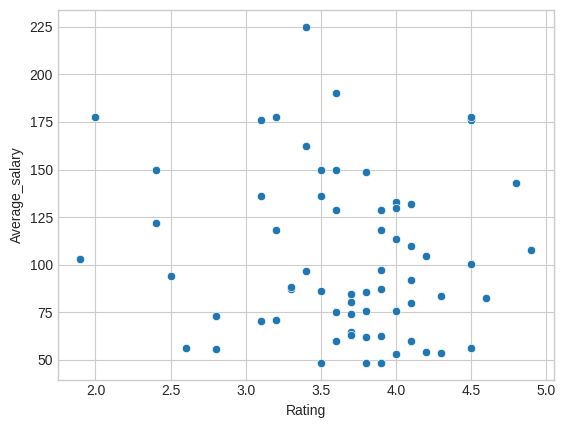

In [81]:
sns.scatterplot(x='Rating', y='Average_salary', data= manager) #اون منجرهایی که روی اون شغل ریویه بالاتری داشتن حقوق کمتری دارند که حقوق بالا مربوط به حقوق های ۳ تا ۳/۵ هستش. توجه کنید که تراکم کجاست دوستان

In [82]:
df[df['Job Title']=='data scientist']

,Job Title,Rating,Average_salary,State
0,data scientist,3.5,146.0,NY
1,data scientist,4.5,146.0,NY
3,data scientist,3.4,146.0,NY
4,data scientist,2.9,146.0,NY
8,data scientist,3.9,146.0,NY
...,...,...,...,...
4851,data scientist,3.8,100.0,OH
4859,data scientist,4.2,99.0,OH
4861,data scientist,4.0,101.5,OH
4871,data scientist,4.0,97.0,OH


In [83]:
data_scientist = df[df['Job Title']=='data scientist']

<Axes: xlabel='Rating', ylabel='Average_salary'>

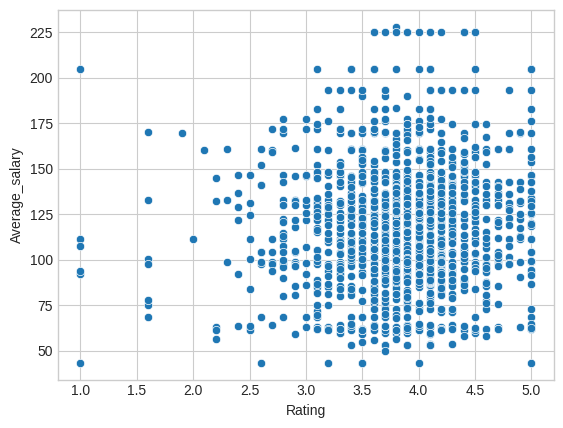

In [84]:
sns.scatterplot(x='Rating', y='Average_salary', data = data_scientist) #توجه کنید در این خروجی در دیتاساینس  هر چقدر ریویو ها بالاتر بنابراین درآمد بالاتر  در شکل در ریف آخر اون چند حقوق بالا مرتبط است با ریتینگ بالای شرکت

In [85]:
df[df['Job Title']=='researcher']

,Job Title,Rating,Average_salary,State
5,researcher,4.4,146.0,NY
7,researcher,4.8,146.0,NY
20,researcher,4.1,146.0,NY
202,researcher,4.2,134.0,NY
211,researcher,5.0,152.0,NY
241,researcher,5.0,111.5,NY
257,researcher,3.9,111.5,NY
259,researcher,3.9,111.5,NY
611,researcher,3.8,63.0,IL
618,researcher,4.1,63.0,IL


In [86]:
researcher = df[df['Job Title']=='researcher']

In [87]:
researcher_data = df[df['Job Title']=='researcher']  # Assign to a more descriptive name

<Axes: xlabel='Rating', ylabel='Average_salary'>

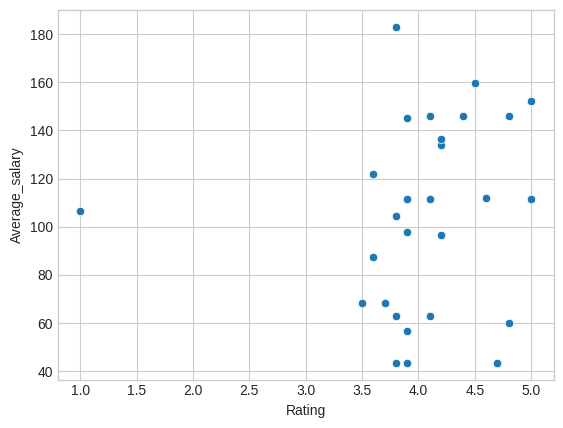

In [88]:
sns.scatterplot(x='Rating', y='Average_salary', data=researcher_data)


In [89]:
df[df['Job Title']=='machine learning engineer']

,Job Title,Rating,Average_salary,State
87,machine learning engineer,4.8,99.0,NY
152,machine learning engineer,3.0,205.0,NY
172,machine learning engineer,3.9,133.0,NY
195,machine learning engineer,3.8,134.0,NY
201,machine learning engineer,3.6,134.0,NY
...,...,...,...,...
4614,machine learning engineer,4.1,154.0,NJ
4719,machine learning engineer,4.3,174.5,OH
4752,machine learning engineer,4.8,87.5,OH
4764,machine learning engineer,4.0,72.0,OH


In [90]:
machine_learning_engineer = df[df['Job Title']=='machine_learning_engineer']

In [91]:
machine_learning_engineer_data = df[df['Job Title']=='machine_learning_engineer']

<Axes: >

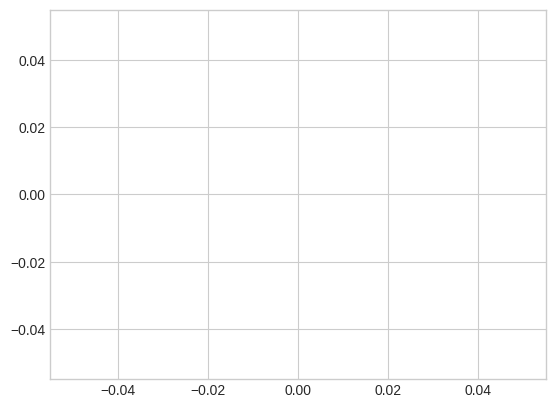

In [92]:
sns.scatterplot(x='Rating', y='Average_salary', data=machine_learning_engineer_data)

In [93]:
df[df['State']=='DE']

,Job Title,Rating,Average_salary,State
1401,data scientist,4.0,122.0,DE
1404,data engineer,5.0,122.0,DE
1634,data scientist,3.3,96.5,DE
1645,data scientist,3.9,190.0,DE
1659,other,3.9,190.0,DE
1668,other,3.6,190.0,DE
1669,data scientist,3.7,190.0,DE
1691,data scientist,3.8,78.5,DE
1695,data engineer,3.9,78.5,DE


In [94]:
de= df[df['State']=='DE']

<Axes: xlabel='Rating', ylabel='Average_salary'>

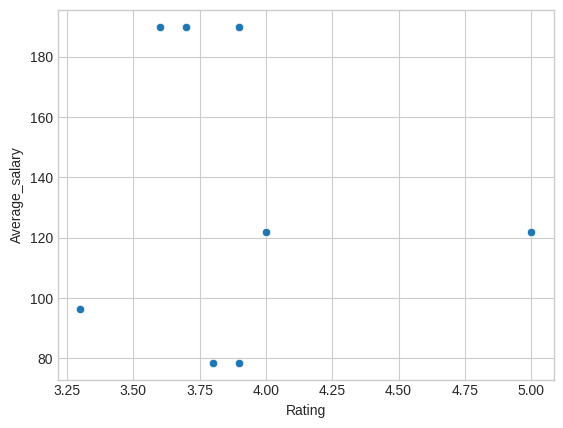

In [95]:
sns.scatterplot(x='Rating', y='Average_salary', data= de)

In [96]:
df[df['State']=='NY']

,Job Title,Rating,Average_salary,State
0,data scientist,3.5,146.0,NY
1,data scientist,4.5,146.0,NY
3,data scientist,3.4,146.0,NY
4,data scientist,2.9,146.0,NY
5,researcher,4.4,146.0,NY
...,...,...,...,...
281,data scientist,4.4,107.5,NY
282,data scientist,3.4,107.5,NY
283,data scientist,3.7,107.5,NY
284,data scientist,4.0,160.5,NY


In [97]:
ny= df[df['State']=='NY']

<Axes: xlabel='Rating', ylabel='Average_salary'>

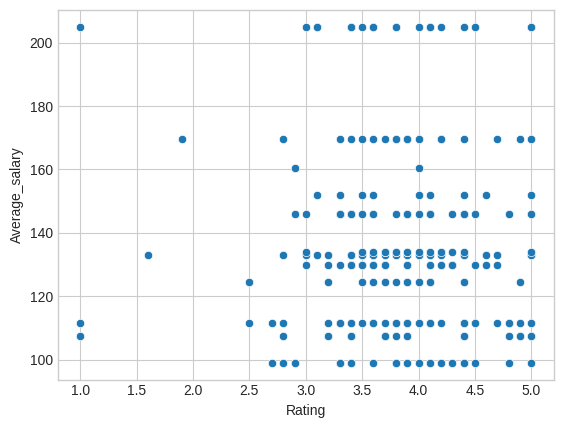

In [98]:
sns.scatterplot(x='Rating', y='Average_salary', data= ny)#در ایالت نیویورک ریویوها معمولا از ۲.۵ یا ۳ بالاتر هستند

In [99]:
df[df['State']=='NJ']

,Job Title,Rating,Average_salary,State
2,analyst,3.4,146.0,NJ
58,data scientist,3.9,133.0,NJ
68,data scientist,3.3,99.0,NJ
117,data scientist,3.7,111.5,NJ
123,data scientist,3.4,169.5,NJ
...,...,...,...,...
4673,other,4.0,127.5,NJ
4674,other,3.4,68.0,NJ
4675,other,4.1,92.0,NJ
4676,analyst,4.1,162.5,NJ


In [100]:
nj= df[df['State']=='NJ']

<Axes: xlabel='Rating', ylabel='Average_salary'>

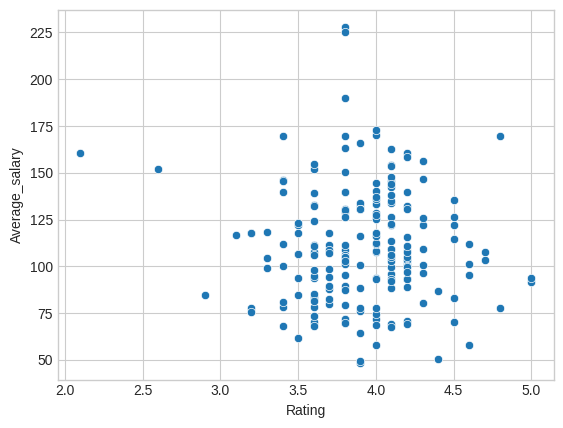

In [101]:
sns.scatterplot(x='Rating', y='Average_salary', data= nj)

In [102]:
df[df['State']=='OH']

,Job Title,Rating,Average_salary,State
3312,data scientist,4.2,131.5,OH
3313,data scientist,4.2,131.5,OH
3314,machine learning engineer,4.2,131.5,OH
3315,data scientist,4.2,131.5,OH
3316,data scientist,3.1,131.5,OH
...,...,...,...,...
4886,other,3.2,51.0,OH
4887,other,4.2,68.0,OH
4888,other,4.0,89.5,OH
4889,analyst,4.0,89.0,OH


In [103]:
oh= df[df['State']=='OH']

<Axes: xlabel='Rating', ylabel='Average_salary'>

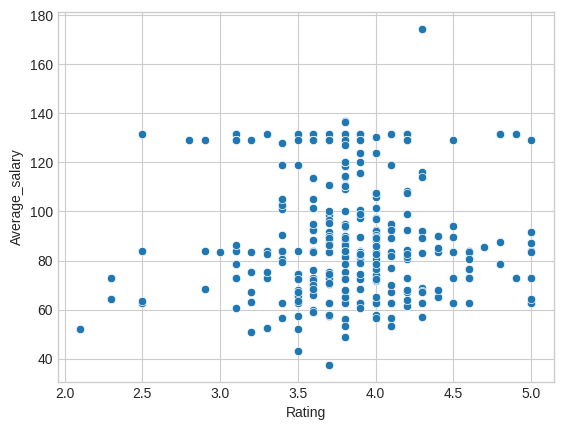

In [104]:
sns.scatterplot(x='Rating', y='Average_salary', data= oh)

In [105]:
df[df['State']=='CA']

,Job Title,Rating,Average_salary,State
287,data scientist,4.5,133.0,CA
288,data scientist,3.9,133.0,CA
289,data scientist,3.8,133.0,CA
290,data scientist,3.9,133.0,CA
291,analyst,4.0,133.0,CA
...,...,...,...,...
3725,data scientist,4.3,94.5,CA
3726,other,2.8,74.5,CA
3727,data scientist,3.8,85.5,CA
3728,data scientist,4.2,110.0,CA


In [106]:
ca= df[df['State']=='CA']

<Axes: xlabel='Rating', ylabel='Average_salary'>

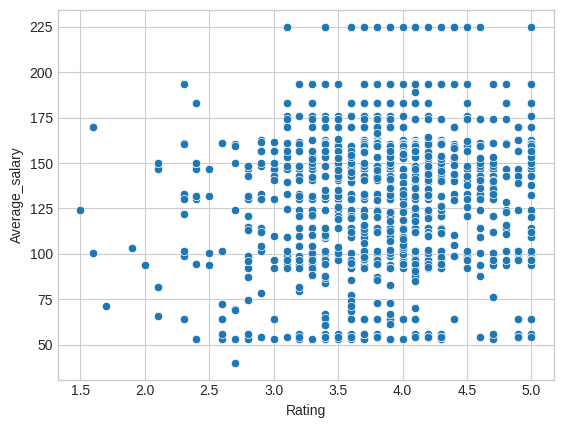

In [107]:
sns.scatterplot(x='Rating', y='Average_salary', data= ca)

In [108]:
df

,Job Title,Rating,Average_salary,State
0,data scientist,3.5,146.0,NY
1,data scientist,4.5,146.0,NY
2,analyst,3.4,146.0,NJ
3,data scientist,3.4,146.0,NY
4,data scientist,2.9,146.0,NY
...,...,...,...,...
4886,other,3.2,51.0,OH
4887,other,4.2,68.0,OH
4888,other,4.0,89.5,OH
4889,analyst,4.0,89.0,OH


In [109]:
import pandas as pd

In [110]:
pd.get_dummies(df, columns=['Job Title'],dtype=int)

,Rating,Average_salary,State,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,Job Title_researcher
0,3.5,146.0,NY,0,0,1,0,0,0,0,0,0
1,4.5,146.0,NY,0,0,1,0,0,0,0,0,0
2,3.4,146.0,NJ,1,0,0,0,0,0,0,0,0
3,3.4,146.0,NY,0,0,1,0,0,0,0,0,0
4,2.9,146.0,NY,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4886,3.2,51.0,OH,0,0,0,0,0,0,0,1,0
4887,4.2,68.0,OH,0,0,0,0,0,0,0,1,0
4888,4.0,89.5,OH,0,0,0,0,0,0,0,1,0
4889,4.0,89.0,OH,1,0,0,0,0,0,0,0,0


اگر دیدی تو کدت بجای صفر و یک شدش فالس و تورو !! آخره کدت
این.  dtype=int
اضافه کن.

In [111]:
pd.get_dummies(df, columns=['Job Title','State'],dtype=int)

,Rating,Average_salary,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
0,3.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.4,146.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.4,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2.9,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,3.2,51.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4887,4.2,68.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4888,4.0,89.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4889,4.0,89.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


یادتون باشه قبل از اینکه وارد ماشین لرنینگ بشی همه چیز باید تبدیل به عدد شده باشه و بعد روی دیتا عمل ماشین لرنینگ انجام بدی.

In [112]:
df = pd.get_dummies(df, columns=['Job Title','State'],dtype=int)  #این تابع برای تبدیل متغیرهای دسته‌ای به متغیرهای دامی استفاده می‌شود.

In [113]:
df.info() #این دیتا فریمی است که قراره روی آن کار انجام بشه به اصطلاح فیچر اینجینرینگ کردیم
#تمامی اعداد یا فلوت هستند یا اینتیجر

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rating                               4891 non-null   float64
 1   Average_salary                       4891 non-null   float64
 2   Job Title_analyst                    4891 non-null   int64  
 3   Job Title_data engineer              4891 non-null   int64  
 4   Job Title_data scientist             4891 non-null   int64  
 5   Job Title_deep learning engineer     4891 non-null   int64  
 6   Job Title_director                   4891 non-null   int64  
 7   Job Title_machine learning engineer  4891 non-null   int64  
 8   Job Title_manager                    4891 non-null   int64  
 9   Job Title_other                      4891 non-null   int64  
 10  Job Title_researcher                 4891 non-null   int64  
 11  State_AZ                      

In [114]:
df.to_csv('preprocessed_df.csv', index= False)  #سیو میکنیم و برای اینکه ایندکسها نیان و ستون جدید نشن در دیتا فریم ما پس ایندکسشو میزاریم فالس

In [115]:
X = df.drop(columns = 'Average_salary')    #کاهش ابعاد دیتافریم برای بهبود عملکرد و کارایی

In [116]:
y = df['Average_salary'] #ایکس ها یعنی متغییر مستقل و ایگرگ متغییر وابسته است که ما مشخص کردیم.یعنی چی داریم و چی دنبالش هستیم.

۴۸۹۱ دیتا رو به دو قسمت تست و تیرین نقسیم میکنیم.ترین برای اینکه ما مدل ماشین لرنینگ روآموزش بدیم و تست اینکه مدلی که آموزش دادیم ببینیم درست آموزش دیده؟درست میتونه آینده رو پیش بینی بکنه یا نه؟

In [117]:
from sklearn.model_selection import train_test_split #قسمت هوش مصنوعی از اینجا شروع میشه

این کتابخونه اجازه میده ما تقسیم بندیمون رو انجام بدیم. از طرفی اینکه سایکیلرن در گوگل نوت بوک هست اما برای ژوپیتر و غیره باید دانلود کنیم.

توجه کن سری اول ستونی ایکس و ایگرگ ها رو تقسیم کردیم الان میخوایم سطری تقسیم بندی کنیم.پس مجموع ما ۴ تا دسته داریم ۲ تا ستونی و دو تا سطری.و این تقسیم بندی کاملا رندوم اتفاق میوفته. پس ۴ تا دسته ما میشه ایکس تست ایکس تیرین و ایگرگ تست و ایگرگ تیرین.

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)#اولین کاری که ما باید اینجا انجام بدیم اینکه متغییر وابسته رو از متغییر مستقل جدا کنیم

 متغییر مستقل ما همه ستونها هستند بجز ستون میانگین حقوق و مغییر وابسته مون که تارگت ماست همون میانگین حقوق هست که ما دنبالش هستیم.یعنی همون ایگرگمون هست بالاترما ستون میانگین حقوق رو حذف کردیم دراپ کردیم پس دیتای ما همه ستونها هستند بجز میانگین حقوق. اینجا من مینوسیم دودهم یعنی هشتاد به بیست تقسیمش بکنه.اینجا ۱۰۱ یک الگو هست.

In [119]:
X_train  #۸۰ درصد داستان
#برای اینکه ببینیم چه اتفاقی افتاده میایم میبینیم ایکس ترینمون چیه؟
#ایکس ترینمون همون دیتا فریمی هست که ما بالا داریم
#تعداد سطرهاش ۳۹۱۲ هست چون فقط ۸۰ درصد اوناست

,Rating,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,Job Title_researcher,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
4426,3.7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897,3.4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
140,1.9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2440,4.1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2868,3.5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,3.8,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4171,4.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599,4.1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1361,3.7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X_test  #۲۰ درصد داستان   و  ۳۳ تا ستون داریم
#اینجا ۹۷۹ سطر است یعنی مجموع ۹۷۹ با ۳۹۱۲ باید بشه ۴۸۹۰

,Rating,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,Job Title_researcher,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
3982,3.9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2777,3.4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2369,4.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4002,3.4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3907,3.5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,4.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
403,4.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,2.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4090,3.2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
y_train #تعداد سطر همانند چیزی که در ایکس ترین هم مشاهده کردید یعنی ۳۹۱۲

4426    160.0
897      82.5
140     169.5
2440     68.5
2868    148.5
        ...  
4079    119.5
4171    129.5
599      63.0
1361    104.0
1547    130.0
Name: Average_salary, Length: 3912, dtype: float64

In [122]:
y_test  #تعداد سطر در اینجا ۹۷۹ است

3982     82.0
2777    156.5
2369     70.5
4002     65.5
3907    127.0
        ...  
951     132.5
403     176.0
1002     53.5
4090     64.0
1812    118.5
Name: Average_salary, Length: 979, dtype: float64

قراره ما یک معادله ریاضی از کتابخونه سایکلرن بگیریم و به این معادله آموزش بدیم این ایکسهای تیرین جوابشون شده این ایگرگهای تیرین وقتی اینو ببینه معادله رو حل میکنه و ضرايب رو مشخص میکنه. میتونه بگه هر کدوم از این ستونها چقدر تو میانگین حقوق تاثیر داشتن و وزنشون چقدر بوده یعنی میتونه وزن هر یک از پارامترها رو پیدا کنه.

In [123]:
from sklearn.linear_model import LinearRegression #سایکلرن از لینیر مدل ایمپورت کن لینیر رگرشن

در اینجا لینیررگرشن رو ایمپورت کرد از لینیر مدل . در اینجا معادله به صورت  
y(salary stimate)=b0+b1*x1+b2x2+b3x3+....
در اینجا ایکسها ستونهای ما هستند. در اینجا هنوز ضرایب مشخص نیست زمانی میتونیم ضرایب رو مشخص کنیم که بهش آموزش بدیم.
بیایم ایکس های تیرین و ایگرگ ترین رو بهش نشون بدیم تا ضرایب رو پیدا کنه.
وقتی فهمید میگه هر کدوم از این ستونها چقدر میتونه تاثیر داشته باشن؟!

In [124]:
lr = LinearRegression() #اگر بخواهید یک مدل رگرسیون خطی ایجاد کنید ابتدا باید کتابخانه ای مانند رگرسیون رو وارد کنید و سپس از کلاس استفاده کنید

در دستور بالا مرحله اینسیشیت میگیم (یعنی مقدار دهی اولیه). فعلا ال آر یک معادله است و یک اسم دلخواه. ما قبلا از سایکیلرن رو ایمپورت کردیم. یعنی اگر بخواهید یک مدل رگرسیون خطی ایجاد را از دستور سایکیتلرن کنید ابتدا باید کتابخانه ای مانند لینیررگرشن وارد کنید.

In [125]:
lr = lr.fit(X_train,y_train) #آموزش میدیم با متد فیت و وقتی این معادله حل میشود ضرایب مشخص میشود

متد فیت میاد آموزش رو یاد میده.در اینجا اون ضرایب نا معلوم مشخص میشن یعنی چیا؟
b0 , b1 , b2  
حالا دستور بالا ران شد و ایکس و ایرگهارو دید و حالا ضرایب مشخص شد.
حالا میتونه پیش بینی بکنه.

In [126]:
print(lr.intercept_) #مرحله عرض از مبدا را پیدا میکنیم
#مرحله اینترسپت یا همون عرض تز مبدا

-162420192063556.16


در دستور بالا عرض از مبدا رو پیدا میکنبم یا همون ب صفر که قبلا نشون دادیم
این مقدار ب صفر هست.
خیلی هم مقدار بزرگی شده

In [127]:
print(lr.coef_) #در اینجا بقیه  ضرایب را مشاهده میکنیم

[1.84575928e+00 1.60508773e+14 1.60508773e+14 1.60508773e+14
 1.60508773e+14 1.60508773e+14 1.60508773e+14 1.60508773e+14
 1.60508773e+14 1.60508773e+14 1.91141866e+12 1.91141866e+12
 1.91141866e+12 1.91141866e+12 1.91141866e+12 1.91141866e+12
 1.91141866e+12 1.91141866e+12 1.91141866e+12 1.91141866e+12
 1.91141866e+12 1.91141866e+12 1.91141866e+12 1.91141866e+12
 1.91141866e+12 1.91141866e+12 1.91141866e+12 1.91141866e+12
 1.91141866e+12 1.91141866e+12 1.91141866e+12 1.91141866e+12
 1.91141866e+12]


[ y = b_0 + 1.84 \times \text{rating} ]
در اینجا:

( y ) نشان دهنده متغیر وابسته یا خروجی است.
( b_0 ) نشان دهنده عبارت ثابت (intercept) است.
( \text{rating} ) نشان دهنده متغیر وابسته یا ورودی است که با ضریب 1.84 ضرب می‌شود.
این فرمول یک مدل خطی ساده را نشان می‌دهد که بتوان با استفاده از آن پیش‌بینی ( y ) بر اساس مقدار (\text{rating}) انجام داد.



ریتینگ همون ستون اول هست که مقدارش هر چی میتونه باشه مثل تایم یا یک تکس مثل ریتینگ. این مدل آموزش دیده و آمادست تا مدل پیش بینی رو انجام بده.لازمه قبل از پیش بینی باید امتحانش کنیم و یکسری دیتاها هم گذاشته بودیم که امتحانش کنیم مثل ایکس تست و ایگرگ تست و الان ایکسهای تست رو میدیم تا ببینیم چه ایگرگ هایی رو پیش بینی میکنه و در نهایت چه مینگین حقوقی رو پیش بینی میکنه؟ و اون میانگین حقوق رو مقایسه میکینم با ایگرگ های تست های واقعی که قبلا اتفاق افتاده و ما انتظار نداریم دقیقا همون عدد باشه و اگر تفاوتش کم باشه این پیش بینیء پیش بینی قابل اعتمادی خواهد بود.

In [128]:
prediction = lr.predict(X_test)   #یکسری دیتاها هم گذاشته بودیم که امتحانش کنیم مثل ایکس تست و ایگرگ تست و الان ایکسهای تست رو میدیم تا ببینیم چه ایگرگ هایی رو پیش بینی میکنه

In [129]:
prediction  #خروجی اعداد رو ببینی و انتظار میرفت همینا باشه چون پیش بینی  حقوق تو همین رنج بود

array([ 92.9375 , 124.0625 ,  91.1875 ,  75.03125,  99.75   , 122.     ,
        91.1875 ,  84.15625, 106.53125, 129.8125 ,  77.4375 , 139.1875 ,
        97.6875 ,  87.71875,  97.6875 ,  97.34375,  97.0625 , 136.78125,
        94.125  , 109.1875 , 139.     ,  87.21875, 122.75   , 121.8125 ,
        88.96875,  75.21875,  93.59375, 107.4375 ,  90.8125 , 125.90625,
        96.34375, 121.625  ,  88.03125,  98.25   ,  85.59375, 123.5    ,
        99.     , 112.1875 ,  90.34375, 114.     , 123.3125 , 122.     ,
       106.15625,  88.8125 ,  78.15625, 125.34375,  94.59375, 125.15625,
       100.09375, 116.25   , 149.8125 , 103.125  , 137.53125,  88.4375 ,
       106.71875,  89.71875, 138.28125,  99.375  ,  97.28125, 106.53125,
       129.625  , 138.09375,  90.25   , 121.09375,  98.4375 ,  76.3125 ,
        80.03125, 113.28125, 116.59375,  75.9375 ,  74.09375,  93.59375,
        80.8125 ,  98.5625 , 125.53125,  88.78125, 123.5    ,  83.1875 ,
       116.25   ,  81.1875 , 102.40625, 140.84375, 

In [130]:
residual = prediction - y_test #باید چیزی که پیش بینی کرده رو با ایگرگ تست واقعی مقایسه کنیم
#اگر صفر باشه دیگه ایده آل هست اما در کل باید نزدیک باشه

In [131]:
residual #بهترین حالت اینه تفاوت صفر باشه در اینجا رنج قابل قبولیه
#زیاد نمیشه چشمی گفت اما مثلا تو اولین خونه ۱۱ تا تفاوت داشته

3982    10.93750
2777   -32.43750
2369    20.68750
4002     9.53125
3907   -27.25000
          ...   
951    -39.09375
403    -46.37500
1002    34.00000
4090    10.65625
1812   -20.06250
Name: Average_salary, Length: 979, dtype: float64

In [132]:
import seaborn as sns #برای اینکه رزیجوآل رو ببینیم در این خروجی یک منحنی پراکنده رسم کنیم  از این کتابخونه استفاده میکنیم

<ipython-input-133-579f63df6198>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=50)


<Axes: xlabel='Average_salary', ylabel='Density'>

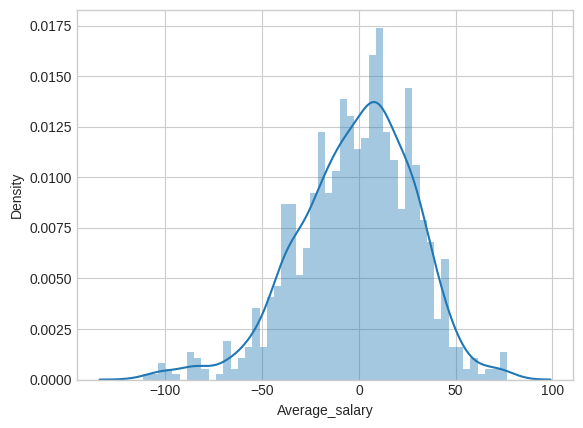

In [133]:
sns.distplot(residual,bins=50)
#این نمودار منحنی رزیجوآل یا باقیمادست .
#چیو نشون میده؟
#این نشون میده تفاوت بین پیش بینی شده و مقدار واقعی که ایگرگ تست ما بود در خیلی از مواقع صفر هستش
#اما چاهایی بوده تفاوت مقدار واقعی و پیش بینی شده پنجاه بوده
#اما جاهایی بوده تفاوت صفر یا مثبته ۱۰۰ یا منفیه ۱۰۰ بوده.
#اما بیشتر این تفاوتها نزدیک به صفر بودند منظور از صفر محور افقی هست و ما به دنبال این بودیم
#در اینجا چون نزدیک به صفر بیشتر بوده ما بیشتر میتونیم به مدل اعتماد کنیم
#اینجا پراکندگی نرماله و مدل قابل اعتمادی هست.
#نمودار ما مدل زنگوله ای است  یعنی تفاوت اعداد پیش بینی شده و تست ما صفر است و بعضی جاها پنجاه یا منفی پنجاه  هم بوده و این تفاوت واقعی و پیش بینی شده است.

البته این میزان دقت کافی نیست ما چندین تا ماتریکس داریم و ما فعلا روی یکی از اونها صحبت میکنیمو و که ام ای ایی هست که میگه مدل ما چقدر خطا داره و چقدر میتونیم روی اون برای پیش بینی جساب کنیم.

Mean absolute error میزان متوسط بزرگی خطاهای پیش‌بینی را اندازه‌گیری می‌کند، بدون در نظر گرفتن جهت خطا (مثبت یا منفی بودن).
MAE = (1 / n) * Σ( |y_i - ŷ_i| )

---



تفسير MAE:



*   هر چه مقدار ام آ ای کمتر باشد، نشان‌دهنده عملکرد بهتر مدل رگرسیون است، زیرا خطای متوسط پیش‌بینی‌ها کمتر است.
*   
ام آ ای واحد اندازه‌گیری مشابه با داده‌های خروجی مدل دارد.
*   ام آ ای برای توزیع خطاهایی که دارای توزیع نامتقارن هستند (یعنی بیشتر خطاها در یک جهت متمرکز شده‌اند) مناسب‌تر است، زیرا تحت تأثیر مقادیر پرت (outlier) قرار نمی‌گیرد.

---



In [134]:
from sklearn import metrics #برای اینکه مطمئن تر بشیم ما از طریق متریکس میفهمیم که کار ما چقدر خطا داره و آیا ما میتونیم از این مدل استفاده کنیم ؟

In [135]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
 #جواب میشه بیست و سه یعنی  هر چیزی که مدل داره نشون میده میتواند بیست و سه تا بیشتر یا کمتر باشد
 #mean_absolute_error هر چی میتونه باشه ما این رو نوشتیم
 #ما میخوایم ببینیم  ام ای ایی چقدر هستش؟

MAE: 23.458407814096017


توجه کنید این اومد معادله ام ای ایی رو که سطر بالا بهش اشاره کردیم رو حل کرد. هر کدوم از این ایگرگهای تست رو منهای پیش بینی شده اش کرد و قدرمطلق گرفت و همه رو با هم جمع کرد و تقسیم بر تعدادشون کرد که اینج ۹۷۲ بود کرد و نتیجه رو به ما داد که شد ۲۳. تفصیر این ۲۳ خیلی مهمه و این تفسیر رو باید یاد بگیریم این ۲۳ نشون میده که هر پیش بینی که مدل داره انجام میده میتونه ۲۳ تا بیشتر یا ۲۳ تاکمتر باشه مثلا اگه میگه حقوق ۱۳۰ هزار دلار در سال هست این ۱۳۰ میتونه بعلاوه ۲۳ یا منهای ۲۳ باشه
توجه کنید این تفسیر خیلی مهمه چون من وقتی میخوام قرارداد ببندم دیگه میدونم رنج حقوق چیه و میدونمکمترین یا بیشترین حقوق چیه ؟ پس تو قرارداد میدونم چه عددی باید نوشنه بشه .
اما یه کس دیگه من میخوام بازه حقوقی کمتر باشه و ۲۳ عدد زیادی هست مثلا پنج هزار دلار باشه. این کاملا بستگی به اون بیزینس داره.
دقت کن ما اینجا ۳ تا پارامتر داشتیم اگر میتونستیم پارامترهای بیشتری رو هم بتونیم دخیل کنیم شاید ششرایط و اعداد متفاوت تر و نوع تحلیل متفاوت تر بود. و حتی این عرور کمتر میتونست باشه.

In [136]:
import pickle  #

حالا این مدل آموزش دیده شده با این مقدار خطا رو چیکار باید بکنیم؟
برای اینکه از این مدل استفاده بکنیم باید مدلمون رو سیو کنیم یا دامپش بکنیم
زمانیکه که ما مدل رو سیو میکنیم دیگه مدل سیو شده هستش که به درد ما میخوره
ما دیگه به این دیتافریمی که اینجا داشتیم احتیاج نخواهیم داشت
چون تو معادله ما اون الگوریتمی که دتریم ضرایبش مشخص شده
دیگه لازم نیست ما دیتایی داشته باشیم تا اون ضرایب مشخص شه
اون ضرایب مشخص شده کافی هستند تا اگر ما یه شرایط جدید داشتیم
از مدل بخوایم تا میانگین حقوق رو برامون پیش بینی بکنه
این مدل که سیوش میکنیم میره برای بک اند یک مدل اپلیکیشن یا وب سایت و مدلی که هر جا بخواییم ما پیش بینی بکنیم از اون مدل ما استفاده میکینم بدون نیاز به دیتا ستی که بوده که ما اول پیکل رو اول ایمپورت کردیم.

In [137]:
pickle.dump(lr, open('Salary_Estimater.pkl' , 'wb')) #من این مدل رو سیو یا دام میکنم این مدل میشه بکند  یک مدل بدون دیتاست . از اینجا به بعد ما دیگه خودمون میتونیم عدد بدیم یا ریتینگ



```
# This is formatted as code
```

Salary_Estimater.pkl   
هر اسمی میتونی سیوش کنی.
اینی که ما سیوش کردیم میتونه بیاد تو نت بوک جدید یا در بک اند استفاده بشه.
و ما میتونیم بهش ورودی بدیم یه سری ورودی های جدید.
که به سلیقه خودمون که ریتینگ جدید بدیم
یا جابهایی که مدنظرمون هست رو بدیم و استیتی که مد نظرمون هست رو بدیم
تا میانگینحقوق که پیشنهاد میده چه مقدار حقوق خواهد بود؟؟
میتونی بری دست چپ نت بوکت و از فایلهای ذخیره شده این فایلتو دانلود کنی.

In [138]:
import pandas as pd
import pickle

In [139]:
model_pk = pickle.load(open('Salary_Estimater.pkl','rb'))

model_pk
هراسمس میتونی بزاری من میزارم این.
که همون مدل آموزش دیده شدست که ما میخوایم استفاده کنیم برای پیش بینی.
اگر یادتون باشه ما مدلها رو با ایکسها آموزش دادیم
دیتا فریمی که تمام پیری پراسس رو داشت جز میانگین حقوق.
ما اگر بخواییم مدل ما پیش بینی کنه باید سمپل ما در همون فرمت باشه.
اگر قراره خارج از اون فرمت باشه مدل ندیده و نمیتونه جواب بده.
سمپل ما همونایی که در ایکس بودن حالا سمپل ما باید همانند آنها باشند.


In [140]:
my_sample = {'Rating':3.5 ,  'Job Title_analyst':0,
       'Job Title_data engineer':0, 'Job Title_data scientist':1,
       'Job Title_deep learning engineer':0, 'Job Title_director':0,
       'Job Title_machine learning engineer':0, 'Job Title_manager':0,
       'Job Title_other':0, 'Job Title_researcher':0, 'State_AZ':1, 'State_CA':0,
       'State_DC':0, 'State_DE':0, 'State_FL':0, 'State_GA':0, 'State_IL':0, 'State_IN':0,
       'State_KY':0, 'State_MA':0, 'State_MD':0, 'State_ME':0, 'State_MI':0, 'State_NC':0,
       'State_NH':0, 'State_NJ':0, 'State_NM':0, 'State_NY':0, 'State_OH':0, 'State_PA':0,
       'State_TX':0, 'State_VA':0, 'State_WI':0}

برای اینکه سمپل ما همون ستونها رو داشته باشه اول از یک دیکشنری استفاده کردم. یک دیکشنری درست کنیم تا همه ستونهایی که توی ایکس بود رو داشته باشه
که اسمشو گذاشتم مای سمپل
اعضای دیکشنری جفت جفت هستند و با کاما از هم جدا میشن
که قسمت اول رو میگیم کلید یا کی و قسمت دوم میشه ولیو.
قسمت دوم میتونه یه عدد باشه یا یه لیست باشه ما اینجا یه نمونه
سمپل داریم و میخوایم با یه نمونه امتحان کنیم
بنابراین برای هر کدوم از اینا من میخوام یک مقدار بدم
 این مقدارها کاملا اختیاریه چون یه نمونه جدیده دیگه
 من اینجا ۳.۵ گذاشتم چون رنج اعداد بین ۰ تا ۳.۵ هست.
 در نظر داشتم جابتایتل دیتا آنالیست رو که پیش بینی حقوق هست رو در نظر بگیرم
 به همین دلیل Job Title_data scientist':1 رو
 برابر یک گذاشتم و بقیه رو صفر گذاشتم.
 هر چی رو میخوای ببینی و مدنظرته اونو یک بزار.
 در مورد ایالت ها هم همینطور در ابتدا ایالت آریزونا هست
سوال من در راجع با این بوده شما میتونید  یه شغل یا یک ایالت دیگه رو مدنظر داشته باشید.

In [141]:
my_sample = pd.DataFrame([my_sample])
#از پنداس میخوام این دیکشنری رو به یک دیتا فریم تبدیل کنه
#یه وقتهایی لازمه خودمون دیتافریم درست کنیم همیشه فایل آماده نیست
#فایل اماده نیست یکی از روسها ساخت دیکشنری هست مقادیر کلید دیکشنری اسم اون ستونهایی هستند که میخوایم درست بکنیم و مقادیر ولیو های هر ستون رو میتونیم داخل لیست بزاریم به تعداد سطرهایی که اون دیتافریم میخواد داشته باشه
#اینجا دیتافریمی هست که فقط یدونه سطر داره اگر چندین تا سطر داشت میتونستیم بجای ولیو یک لیست درست میکردیم
# و داخل لیست تعداد ولیو ها رو بزاریم
#پس میایم این دیکشنری رو تبدیل میکنیم به دیتا فریم
#مای سمپل رو میخوایم دیتا فریم بکنیم

In [142]:
my_sample.info() #همانطور که انتظار داشتیم یک سطر دارد و مقدار ۳۳ تا ستون دارد

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rating                               1 non-null      float64
 1   Job Title_analyst                    1 non-null      int64  
 2   Job Title_data engineer              1 non-null      int64  
 3   Job Title_data scientist             1 non-null      int64  
 4   Job Title_deep learning engineer     1 non-null      int64  
 5   Job Title_director                   1 non-null      int64  
 6   Job Title_machine learning engineer  1 non-null      int64  
 7   Job Title_manager                    1 non-null      int64  
 8   Job Title_other                      1 non-null      int64  
 9   Job Title_researcher                 1 non-null      int64  
 10  State_AZ                             1 non-null      int64  
 11  State_CA                            

این آمادست حالا ما میخواهیم از مدلمون که اینو پیش بینی بکنه

In [143]:
model_pk.predict(my_sample) #خروجی این باید حقوق باشه یک مقداری باشه که به حقوق بخوره
#۸۱.۷۱ هزار دلار چیزس بود که خانم حاتمی در آورد.
#این خروجی برای آریزونا

array([106.71875])

In [144]:
my_sample = {'Rating':3.5 ,  'Job Title_analyst':0,
       'Job Title_data engineer':0, 'Job Title_data scientist':0,
       'Job Title_deep learning engineer':0, 'Job Title_director':0,
       'Job Title_machine learning engineer':0, 'Job Title_manager':0,
       'Job Title_other':0, 'Job Title_researcher':1, 'State_AZ':0, 'State_CA':0,
       'State_DC':0, 'State_DE':0, 'State_FL':0, 'State_GA':0, 'State_IL':0, 'State_IN':0,
       'State_KY':0, 'State_MA':0, 'State_MD':0, 'State_ME':0, 'State_MI':0, 'State_NC':0,
       'State_NH':0, 'State_NJ':0, 'State_NM':0, 'State_NY':1, 'State_OH':0, 'State_PA':0,
       'State_TX':0, 'State_VA':0, 'State_WI':0}

In [145]:
my_sample = pd.DataFrame([my_sample])

In [146]:
model_pk.predict(my_sample)

array([131.21875])

In [147]:
my_sample = {'Rating':3.5 ,  'Job Title_analyst':0,
       'Job Title_data engineer':0, 'Job Title_data scientist':1,
       'Job Title_deep learning engineer':0, 'Job Title_director':0,
       'Job Title_machine learning engineer':0, 'Job Title_manager':0,
       'Job Title_other':0, 'Job Title_researcher':0, 'State_AZ':0, 'State_CA':0,
       'State_DC':0, 'State_DE':0, 'State_FL':0, 'State_GA':0, 'State_IL':0, 'State_IN':0,
       'State_KY':0, 'State_MA':0, 'State_MD':0, 'State_ME':0, 'State_MI':0, 'State_NC':0,
       'State_NH':0, 'State_NJ':0, 'State_NM':0, 'State_NY':1, 'State_OH':0, 'State_PA':0,
       'State_TX':0, 'State_VA':0, 'State_WI':0}

In [148]:
my_sample = pd.DataFrame([my_sample])

In [149]:
my_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rating                               1 non-null      float64
 1   Job Title_analyst                    1 non-null      int64  
 2   Job Title_data engineer              1 non-null      int64  
 3   Job Title_data scientist             1 non-null      int64  
 4   Job Title_deep learning engineer     1 non-null      int64  
 5   Job Title_director                   1 non-null      int64  
 6   Job Title_machine learning engineer  1 non-null      int64  
 7   Job Title_manager                    1 non-null      int64  
 8   Job Title_other                      1 non-null      int64  
 9   Job Title_researcher                 1 non-null      int64  
 10  State_AZ                             1 non-null      int64  
 11  State_CA                            

In [150]:
model_pk.predict(my_sample)

array([136.0625])

این مدل رو نمیتونیم ما اینجوری بدیم به این یوزر چون همه دسترسی به نت بوک ندارند
باید یوزر فرندلی باشه حتما برای کاربر.
خارج از تخصص دیتاساینتیست هست
کسانیکه کارشون فرانت دولوپر هستش.
همکاری بک اند و فرانت اند هست که میان یک فضای یوزر فرندلی درست میکنن.
تا کسی که میخواد از این فضا میخواد استفاده کنه راحت بتونه فقط ورودی بده
الان پایان مدلمون هست.
البته این قسمت خارج از مسیوليت دیتا ساینتسی هست.